In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oecd-global-crude-oil-imports-prices/crude_oil_import_prices.csv


# Reading the data

In [2]:
df=pd.read_csv('/kaggle/input/oecd-global-crude-oil-imports-prices/crude_oil_import_prices.csv') #reading the file
df

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN
...,...,...,...,...,...,...,...,...,...
17355,17355,LUX,OILIMPPRICE,TOT,USD_BAR,M,2016-02,NaN,M
17356,17356,LUX,OILIMPPRICE,TOT,USD_BAR,M,2016-03,NaN,M
17357,17357,LUX,OILIMPPRICE,TOT,USD_BAR,M,2016-04,NaN,M
17358,17358,LUX,OILIMPPRICE,TOT,USD_BAR,M,2016-05,NaN,M


# Filtering and Cleaning the data

In [3]:
df1=df.loc[df['FREQUENCY']=='A'] #considering only the annual frequency
df1

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN
...,...,...,...,...,...,...,...,...,...
16771,16771,LUX,OILIMPPRICE,TOT,USD_BAR,A,2011,NaN,M
16772,16772,LUX,OILIMPPRICE,TOT,USD_BAR,A,2012,NaN,M
16773,16773,LUX,OILIMPPRICE,TOT,USD_BAR,A,2013,NaN,M
16774,16774,LUX,OILIMPPRICE,TOT,USD_BAR,A,2014,NaN,M


In [4]:
df2=df1.pivot_table(index=['LOCATION','TIME'],values='Value').reset_index() #pivoting the dataframe 
df2

,LOCATION,TIME,Value
0,AUS,1980,31.81
1,AUS,1981,35.88
2,AUS,1982,35.42
3,AUS,1983,30.88
4,AUS,1984,29.19
...,...,...,...
818,USA,2011,102.43
819,USA,2012,101.16
820,USA,2013,97.25
821,USA,2014,89.43


In [5]:
df2['TIME']=df2['TIME'].astype(int) #converting the years to integer type

# Plotting the variation of country wise oil price through the years

<AxesSubplot:title={'center':'Variation of oil import prices through the years'}, xlabel='Country', ylabel='Price in Billion USD'>

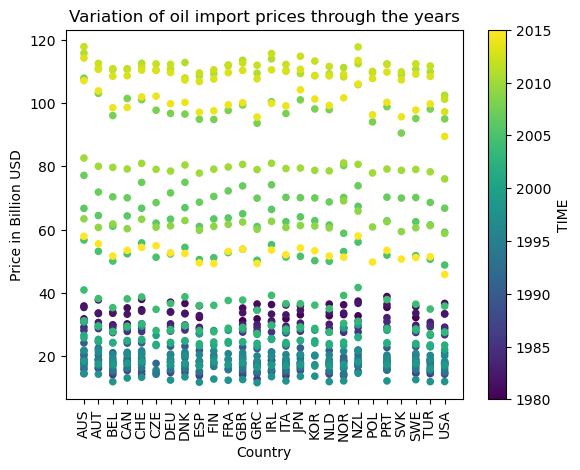

In [6]:
df2.plot.scatter(x='LOCATION',y='Value', c='TIME',colormap='viridis',rot='vertical',title='Variation of oil import prices through the years',xlabel='Country',ylabel='Price in Billion USD')

**Clearly, we can observe that the oil import prices were at a all time low from 1995-2000 for all the countries but post that we can see that the prices have skyrocketed to almost 5 times by the end of 2015**

# Correlation Coefficient of the Oil Price Trend

In [7]:
df3=df2.pivot_table(index='TIME',values='Value',aggfunc='mean').reset_index() #calculating the mean value of all the countries per year
df3

,TIME,Value
0,1980,32.578421
1,1981,36.426316
2,1982,34.062105
3,1983,30.169500
4,1984,29.140500
5,1985,27.875000
6,1986,14.870000
7,1987,18.224000
8,1988,15.043000
9,1989,17.803000


<AxesSubplot:title={'center':'Variation of the Global Oil Prices through the years'}, xlabel='Years', ylabel='Average global Oil Price in Billion USD'>

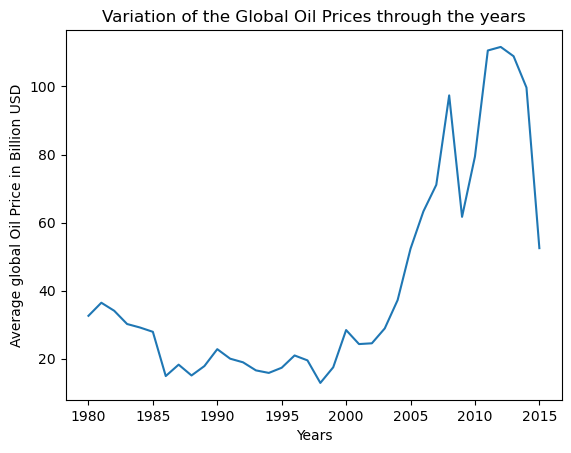

In [8]:
df3.plot.line(x='TIME',y='Value',xlabel='Years',ylabel='Average global Oil Price in Billion USD', title='Variation of the Global Oil Prices through the years',legend=False)


# Finding the best fit line for the above plot

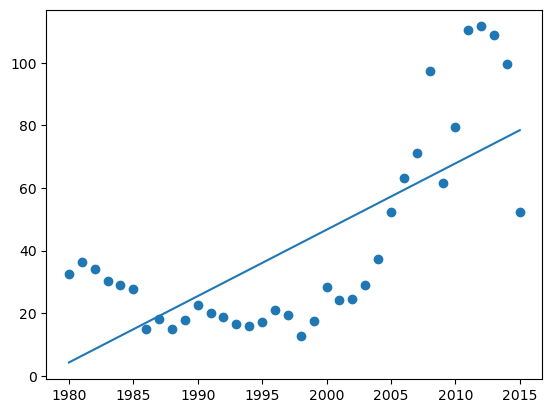

In [9]:
x=np.array(df3['TIME']) #creating seperate numpy arrays
y=np.array(df3['Value']) #creating seperate numpy arrays
a,b=np.polyfit(x,y,deg=1) #finding the best fit line
import matplotlib.pyplot as plt #importing the libraries
plt.scatter(x,y) #scatter plot 
plt.plot(x, a*x+b) #plotting the best fit line

# Prediction using the above best fit line

In [10]:
print('Predicted Mean Value of global Oil imports in 2023 is :',round((a*2023+b),1), 'Billion USD')

Predicted Mean Value of global Oil imports in 2023 is : 95.5 Billion USD
